<a href="https://colab.research.google.com/github/JorgeFBZ/BPP/blob/main/Test_layers_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Nº de neuronas por capa:
Test para ver como afecta el numero de capas y el numero de nodos al resultado de la red.

## Test Variando el numero de neuronas:
Iteracion del numero de neuronas en la segunda capa del ejemplo de clasificacion basica de TF-->
https://colab.research.google.com/github/JorgeFBZ/Tensor-Flow-Tutorials/blob/main/Clasificaci%C3%B3n_B%C3%A1sica_TF.ipynb

In [5]:
# Importar librerías
import tensorflow as tf
from tensorflow import keras
print (tf.__version__)

# Libreías de secundarias:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

2.8.0


In [6]:
# Cargar conjunto de datos:
fashion_mnist =keras.datasets.fashion_mnist
(train_img, train_label),(test_img, test_label)= fashion_mnist.load_data()

In [7]:
# Reshape imagenes:
test_img = test_img/255
train_img = train_img/255

In [17]:
resultados_test = []

Con el bucle for iteramos el numero de capas de la segunda capa desde 20 hasta 200 de 50 en 50. Guardamos los datos de nºcapas, tiempo, loss y accuracy como un lista en resultados_test

In [18]:
for iter in range(20,400,20):
  start_time = time.time()
  model = keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(iter, activation ='relu'),
                keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer = 'adam',
                loss ='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  model.fit(train_img, train_label, epochs=10)
  end_time = time.time()-start_time
  test_loss, test_acc =model.evaluate(test_img, test_label, verbose=2)
  resultados_test.append([iter,end_time,test_loss, test_acc])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5882 - accuracy: 0.8010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4332 - accuracy: 0.8479
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4016 - accuracy: 0.8578
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3816 - accuracy: 0.8644
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8688
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3594 - accuracy: 0.8717
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.8741
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3446 - accuracy: 0.8760
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8802
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.330

In [19]:
df = pd.DataFrame(resultados_test, columns = ["Neurons", "Time", "Loss","Acc"])

In [20]:
df

,Neurons,Time,Loss,Acc
0,20,41.482464,0.421568,0.8527
1,40,38.750373,0.365699,0.8728
2,60,41.716053,0.341420,0.8814
3,80,41.740704,0.349945,0.8761
4,100,46.700680,0.344204,0.8772
5,120,82.416391,0.342884,0.8839
6,140,82.407132,0.338453,0.8853
7,160,52.023210,0.324002,0.8879
8,180,82.466401,0.326770,0.8880
9,200,82.436498,0.335262,0.8800


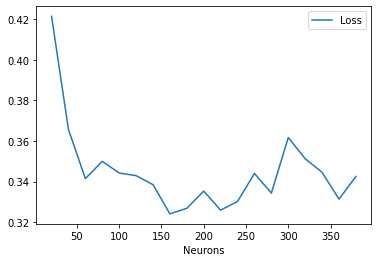

In [32]:
df.plot('Neurons', 'Loss')

In [38]:
min(df['Loss'])

0.3240022361278534

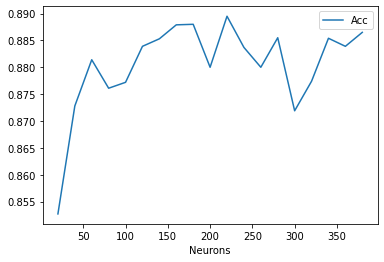

In [33]:
df.plot('Neurons', 'Acc')